## Deepali Handgar
## M.Sc. Computer Science (With Specialization in Data Science)
## University of Mumbai
## Roll. No: 05

# Assignment 8 - Predicting the authors of the disputed federalist papers

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('C:/Users/Dell/Downloads/Disputed_Essay_data.csv')
data.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [3]:
# Splitting the data

data_test = data[data['author']=='dispt']
data_tr = data[data['author']!='dispt']

In [4]:
data_test.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [10]:
data_tr.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
11,Hamilton,Hamilton_fed_1.txt,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,Hamilton,Hamilton_fed_11.txt,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,Hamilton,Hamilton_fed_12.txt,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,Hamilton,Hamilton_fed_13.txt,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,Hamilton,Hamilton_fed_15.txt,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [12]:
# Checking for missing values

data_tr.isna().sum()

author      0
filename    0
a           0
all         0
also        0
           ..
who         0
will        0
with        0
would       0
your        0
Length: 72, dtype: int64

In [22]:
data_tr['author'].value_counts()

Hamilton    51
Madison     15
Jay          5
HM           3
Name: author, dtype: int64

In [13]:
# Seperating the features and target

x = data_tr.drop(['author','filename'], axis = 1)
y = data_tr['author']

x.head()

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
11,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,0.065,0.315,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,0.065,0.258,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,0.088,0.271,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,0.015,0.376,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,0.115,0.211,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [30]:
# Splitting the data for training and testing

x_tr, x_test, y_tr, y_test = train_test_split(x ,y, test_size = 0.2)

In [31]:
# Applying the decision tree

dtree = DecisionTreeClassifier(criterion = 'gini').fit(x_tr, y_tr)

In [32]:
# Predictions

pred = dtree.predict(x_test)

In [33]:
# confusion matrix

cm = confusion_matrix(y_test, pred)
print(cm)

[[9 0 0]
 [0 0 1]
 [0 0 5]]


In [34]:
# Accuracy score

accuracy_score(y_test, pred)

0.9333333333333333

In [46]:
# Random Forest
rfc = RandomForestClassifier(n_estimators = 100).fit(x_tr, y_tr)

In [47]:
pred_rfc = rfc.predict(x_test)

In [48]:
accuracy_score(y_test, pred_rfc)

0.9333333333333333

In [49]:
# Print the decision tree
tree.export_text(dtree)

'|--- feature_59 <= 0.02\n|   |--- feature_28 <= 0.14\n|   |   |--- feature_4 <= 0.58\n|   |   |   |--- feature_27 <= 0.02\n|   |   |   |   |--- feature_53 <= 0.01\n|   |   |   |   |   |--- class: Madison\n|   |   |   |   |--- feature_53 >  0.01\n|   |   |   |   |   |--- class: Hamilton\n|   |   |   |--- feature_27 >  0.02\n|   |   |   |   |--- class: HM\n|   |   |--- feature_4 >  0.58\n|   |   |   |--- class: Jay\n|   |--- feature_28 >  0.14\n|   |   |--- class: Madison\n|--- feature_59 >  0.02\n|   |--- class: Hamilton\n'

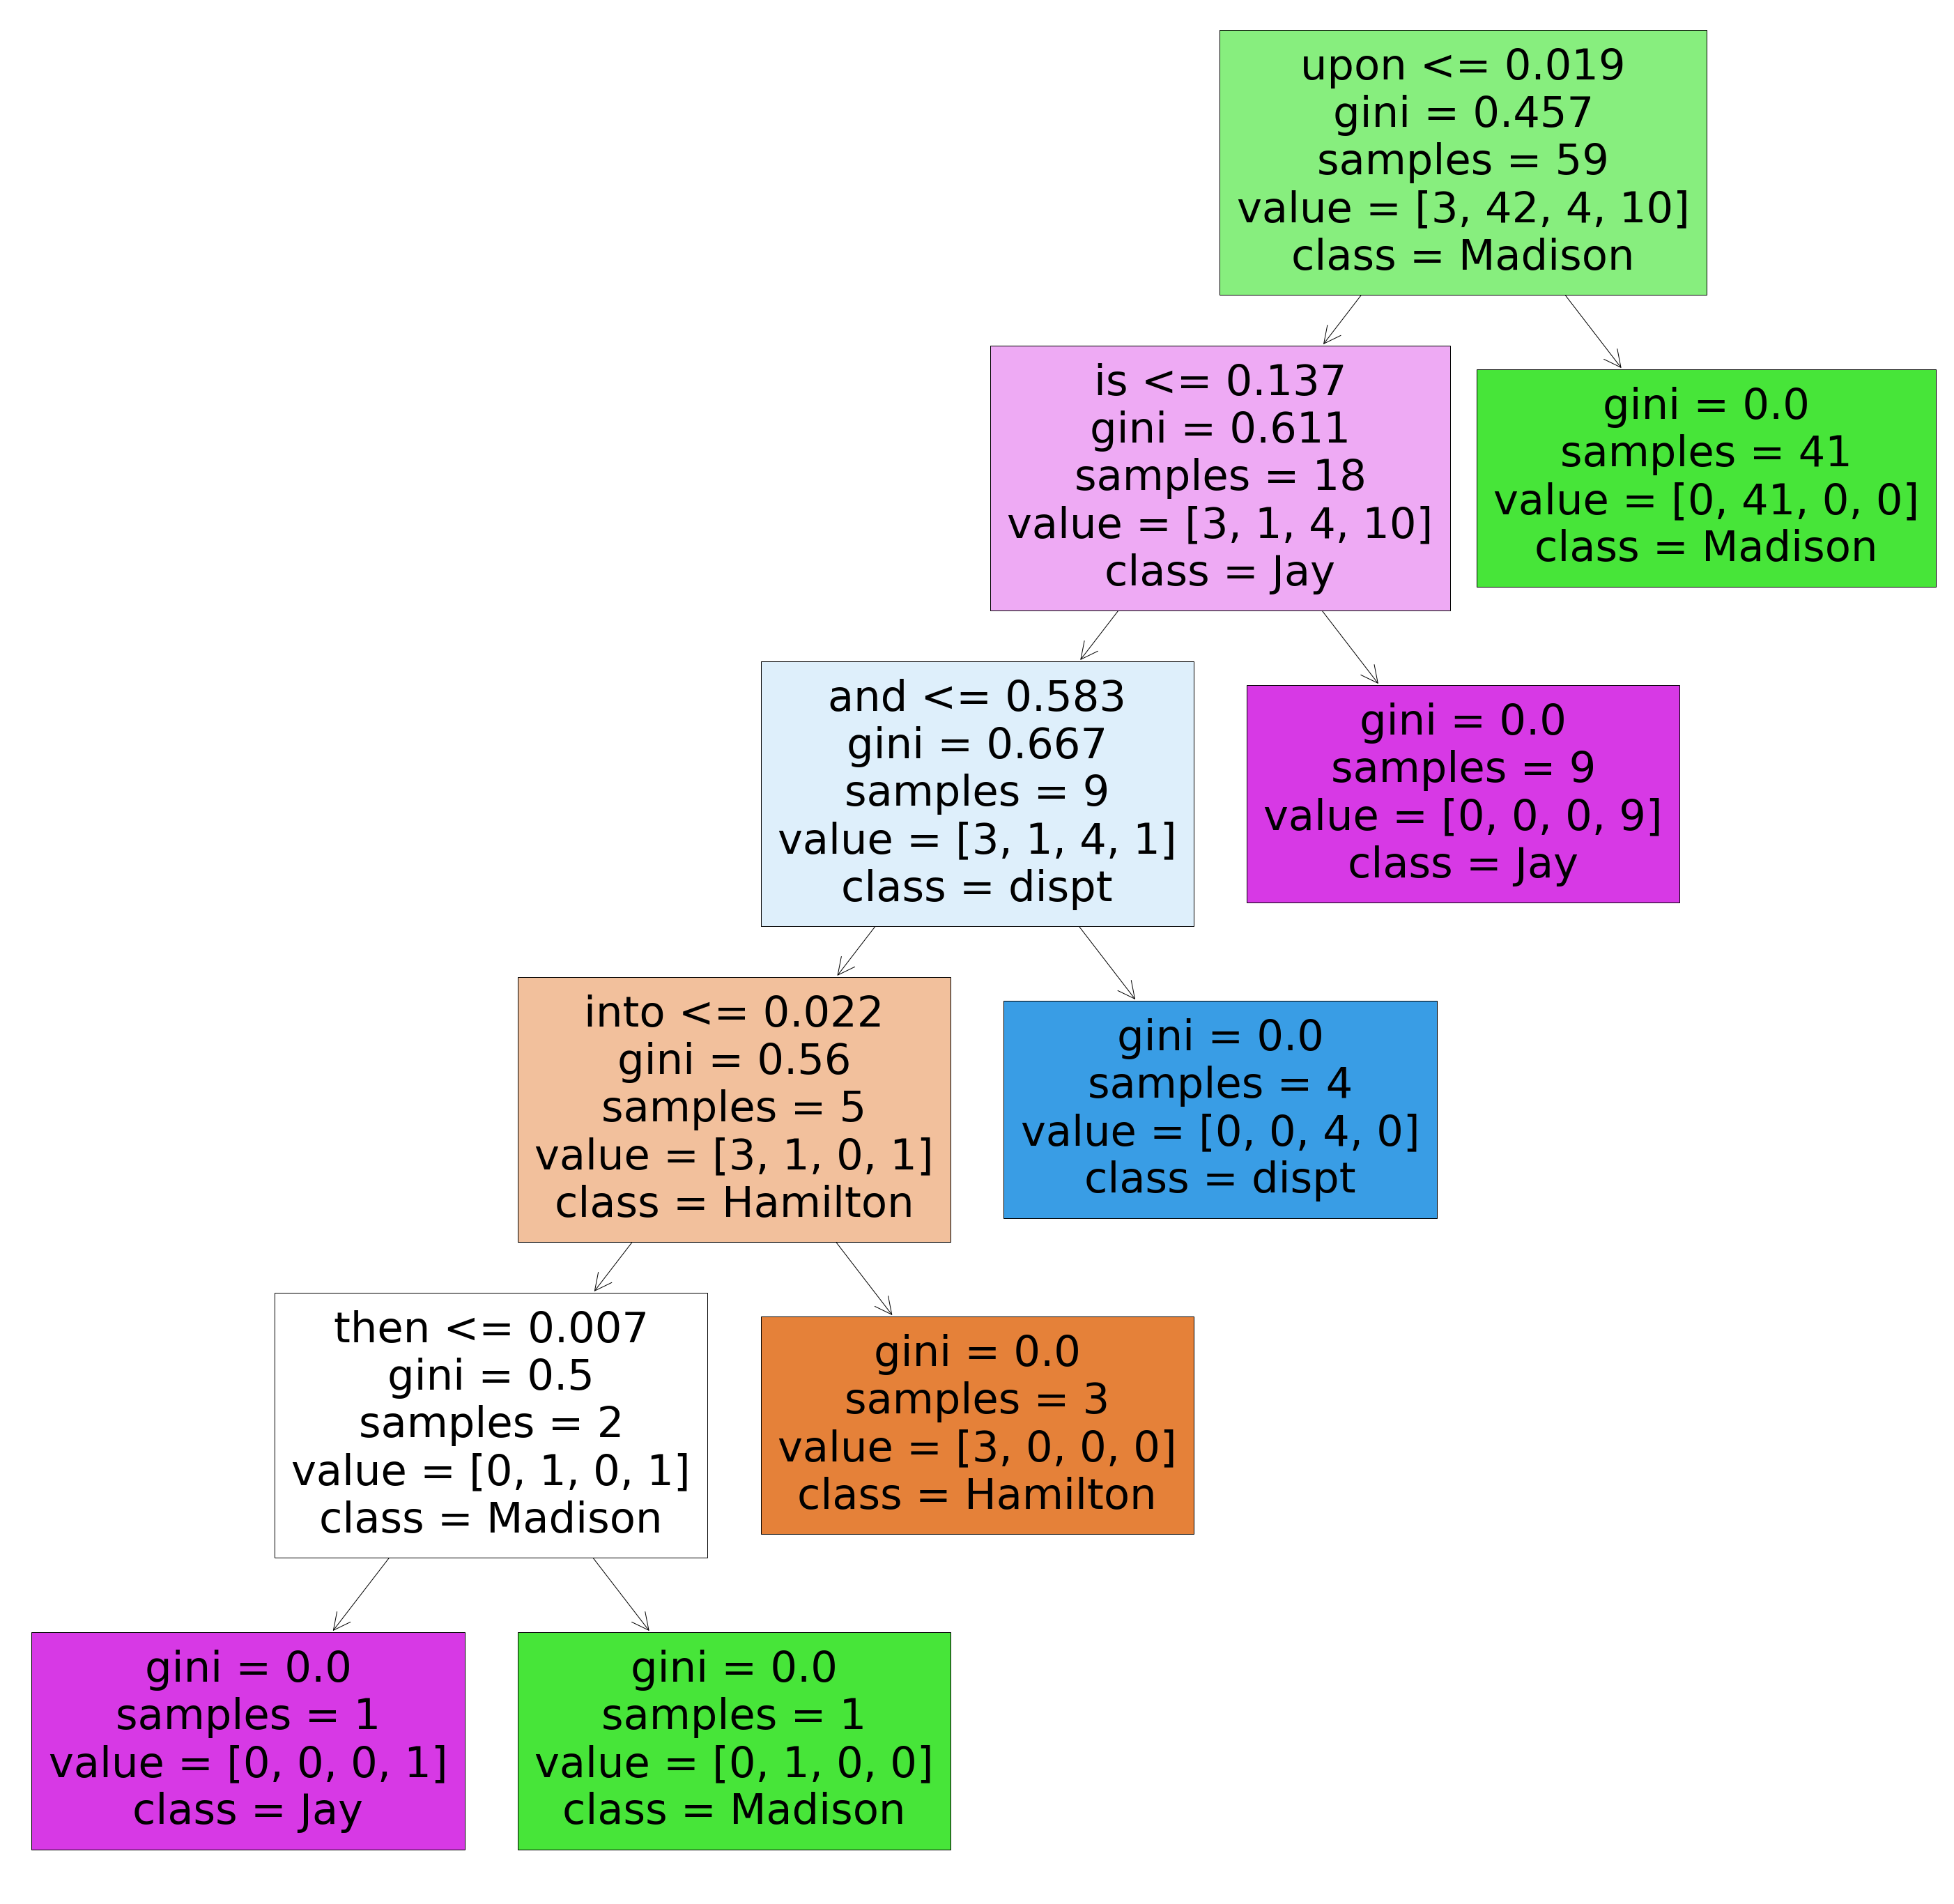

In [53]:
figure = plt.figure(figsize = (50,50))
tree.plot_tree(dtree, feature_names = x.columns,class_names = data['author'].value_counts().index, filled = True)
plt.show()

In [55]:
# Prediction on test data 
data_test = data_test.drop(['author','filename'], axis = 1)

In [56]:
p_test = dtree.predict(data_test)

In [57]:
p_test

array(['Madison', 'HM', 'Madison', 'Madison', 'Madison', 'Madison',
       'Madison', 'HM', 'Madison', 'Madison', 'Madison'], dtype=object)

In [59]:
data_test['Pred_author'] = p_test

In [60]:
data_test.head()

,a,all,also,an,and,any,are,as,at,be,...,were,what,when,which,who,will,with,would,your,Pred_author
0,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,0.411,...,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0,Madison
1,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,0.393,...,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0,HM
2,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,0.474,...,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0,Madison
3,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,0.365,...,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0,Madison
4,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,0.344,...,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0,Madison


In [61]:
# CLUSTERING

In [62]:
x.head()

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
11,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,0.065,0.315,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,0.065,0.258,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,0.088,0.271,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,0.015,0.376,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,0.115,0.211,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [63]:
y.head()

11    Hamilton
12    Hamilton
13    Hamilton
14    Hamilton
15    Hamilton
Name: author, dtype: object

In [65]:
# Scaling
x_scaled = StandardScaler().fit_transform(x)

In [67]:
# Find optimal value of k
wcss = []

for i in range(1,11):
    kmod = KMeans(n_clusters = i, init = 'k-means++').fit(x_scaled)
    wcss.append(kmod.inertia_)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
wcss

[5180.000000000001,
 4797.526633471061,
 4598.081071176668,
 4385.323788977145,
 4226.137200478584,
 4080.801190699165,
 4017.9449274149774,
 3814.711791941277,
 3720.009574638817,
 3627.9235014999995]

<ipython-input-71-c087a77f061d>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(range(1,11), wcss, marker = 'o', c = 'blue', markerFaceColor = 'red')


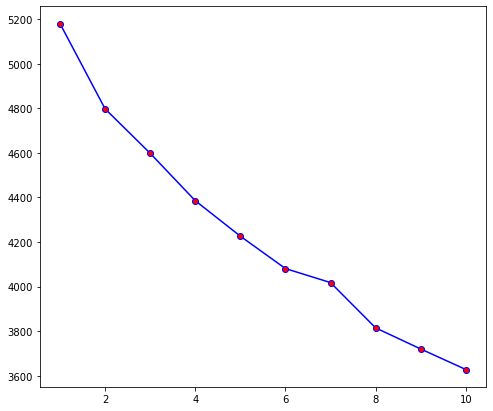

In [71]:
plt.figure(figsize = (8,7))
plt.plot(range(1,11), wcss, marker = 'o', c = 'blue', markerFaceColor = 'red')
plt.show()

In [179]:
# Final
kmod_final = KMeans(n_clusters = 2, init = 'k-means++').fit(x_scaled)

In [180]:
p_final = kmod_final.predict(x_scaled)

In [181]:
p_final

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [182]:
# Silhouette score
score = silhouette_score(x_scaled, kmod_final.labels_,metric = 'euclidean' )
score

0.061137376770185006

In [ ]:
# Try agglomerative clustering

In [172]:
hcluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit(x)

In [173]:
pred_agglo = hcluster.fit_predict(x)

In [174]:
score_agg = silhouette_score(x, hcluster.labels_, metric = 'euclidean')

In [175]:
score_agg

0.10863684960881206

In [162]:
# Using pca
pca_mod = PCA(n_components = 2)
pca_x = pca_mod.fit_transform(x_scaled)

In [163]:
pca_mod.explained_variance_ratio_

array([0.10387435, 0.07703438])

In [164]:
# Now use kmeans on pca data
kmod_1 = KMeans(n_clusters = 2, init= 'k-means++').fit(pca_x)

In [165]:
p_1 = kmod_1.predict(pca_x)

In [176]:
score_1 = silhouette_score(pca_x, kmod_1.labels_, metric = 'euclidean')

In [177]:
score_1

0.4511816572514825